# [Aulas 02 e 03] NumPy (Parte II)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/2560px-NumPy_logo_2020.svg.png" alt="Alternative text" />

[Guia rápido de uso da biblioteca](https://numpy.org/devdocs/user/quickstart.html)

[Guia para iniciantes](https://numpy.org/devdocs/user/absolute_beginners.html)

Na aula passada, vimos que:

- um **array** é o elemento básico por meio do qual a biblioteca *numpy* opera;
- este elemento **difere de uma lista**, por ser homogêneo e possibilitar cálculos de uma maneira altamente eficiente;
- a **indexação** de arrays é muito similar àquela de listas;
- a biblioteca *numpy* fornece ferramentas para gerar arrays baseados em distribuições estatísticas (como uniforme e normal) de maneira aleatória;
- existem diversos métodos que sumarizam alguamas propriedades dos vetores, como *.mean()*, *.std()*, entre outros.

Na aula de hoje, vamos explorar os conceitos de **filtros** e de **matrizes** com numpy.

___

#### Filtros (máscaras)

Uma das funções mais importantes do numpy é a possibilidade de construção de **filtros**, que também são chamados de **máscaras**

O objetivo dos filtros é **selecionar apenas os elementos de um array que satisfaçam determinada condição**

In [1]:
import numpy as np
arr = np.random.rand(20)
arr

array([0.39163378, 0.7557451 , 0.64400319, 0.07166766, 0.10644347,
       0.17922428, 0.72012831, 0.53945704, 0.71086793, 0.06751746,
       0.08966037, 0.76822599, 0.02953686, 0.71485116, 0.07722518,
       0.31411005, 0.1888662 , 0.11990275, 0.17744034, 0.46622416])

Ao usar um **operador lógico** juntamente com um array, o numpy **aplica a operação lógica a cada um dos elementos do array**, retornando um **array de bools** com o resultado de cada uma das operações lógicas:

In [2]:
# quais elementos do array são menores que 0.5?
arr < 0.5 # vai retornar um array de booleanoes

array([ True, False, False,  True,  True,  True, False, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [3]:
# quantos elementos são maiores que 0.5?
(arr > 0.5)

array([False,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False])

In [4]:
maiores_que_05 = (arr > 0.5)
maiores_que_05.sum() # soma apenas True

7

In [5]:
(arr > 0.5).size # tamanho do array

20

In [7]:
len(arr > 0.5) # tamanho do array

20

Uma vez criado o filtro, é possível **utilizá-lo como indexador do array**, para selecionar **apenas os elementos com indice correspondente a True no filtro**

In [8]:
arr[2:5]

array([0.64400319, 0.07166766, 0.10644347])

In [9]:
# quero apenas os elementos que são maiores que 0.5
arr[(arr > 0.5)] # retorna só nas posições em que a comparação é verdadeira

array([0.7557451 , 0.64400319, 0.72012831, 0.53945704, 0.71086793,
       0.76822599, 0.71485116])

In [10]:
arr > 0.5 # retorna o resultado da comparação para TODOS os elementos do array

array([False,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False])

Mais um exemplo...

In [12]:
ints = np.random.randint(0, 100, 20) # 20 números inteiros de 0 a 100

In [13]:
ints

array([96, 31, 70, 74, 85, 56, 26, 60, 90, 50, 41, 49,  9, 52,  9, 49, 33,
       10, 73, 32])

In [14]:
# filtrando apenas os elementos que são pares
ints % 2 == 0

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True, False, False, False,  True,
       False,  True])

In [15]:
ints[ints % 2 == 0]

array([96, 70, 74, 56, 26, 60, 90, 50, 52, 10, 32])

In [16]:
# filtrando apenas os ímpares
ints[ints%2 != 0]

array([31, 85, 41, 49,  9,  9, 49, 33, 73])

In [18]:
ints[ints%2 != 0].size

9

In [19]:
ints[ints%2 != 0].sum() # soma de todos os números ímpares no array

379

[np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [21]:
ints # array original com os inteiros

array([96, 31, 70, 74, 85, 56, 26, 60, 90, 50, 41, 49,  9, 52,  9, 49, 33,
       10, 73, 32])

In [26]:
# Utilizando o where para filtrar os pares
np.where(ints % 2 == 0, ints, np.nan) # np.nan -> dado nulo (not a number)

# com o np.where, o resultado é um array de mesmo tamanho que o original

array([96., nan, 70., 74., nan, 56., 26., 60., 90., 50., nan, nan, nan,
       52., nan, nan, nan, 10., nan, 32.])

Também é possível aplicar **filtros compostos**!

Pra fazer isso, nós fazems uma **composição lógica** entre os filtros (análogo ao "and" e ao "or")

No caso de arrays, usamos:

- "&" para "and"
- "|" para "or"
- "~" para "not"

In [27]:
ints

array([96, 31, 70, 74, 85, 56, 26, 60, 90, 50, 41, 49,  9, 52,  9, 49, 33,
       10, 73, 32])

In [29]:
# queremos filtrar apenas os números pares que também sejam maiores que 50
(ints %2 == 0) & (ints > 50)

array([ True, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False])

In [30]:
ints[(ints %2 == 0) & (ints > 50)]

array([96, 70, 74, 56, 60, 90, 52])

In [35]:
# filtrando divisíveis por 2 OU menores que 50
ints[(ints %2 == 0) | (ints < 50)]

array([96, 31, 70, 74, 56, 26, 60, 90, 50, 41, 49,  9, 52,  9, 49, 33, 10,
       32])

___

### Matrizes

Costumamos nos referir às **matrizes** como arrays multidimensionais (i.e., mais de uma dimensão).

<img src = "https://numpy.org/devdocs/_images/np_create_matrix.png" />

In [3]:
data = np.array([[1,2], [3,4], [5,6]])

In [41]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

[numpy.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)

In [42]:
data.size

6

In [43]:
data.shape # retorna o formato do array 2D: (nlinhas x ncolunas)

(3, 2)

#### Indexação de matrizes

A idexação com matrizes segue a mesma lógica dos arrays. Há algumas formas de indexar o mesmo elemento, conforme ilustrado abaixo.

Suponhamos que queiramos o elemento da segunda linha da matriz, e da segunda coluna.

In [44]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [47]:
# ordem: linha, coluna
data[0,1]

2

In [48]:
data[0,0]

1

In [49]:
data[1,1]

4

Alternativamente, podemos indexar o mesmo elemento escrevendo:

In [51]:
data[0][1]

2

In [53]:
data[0]

array([1, 2])

In [54]:
data[0][1]

2

<img src = "https://numpy.org/devdocs/_images/np_matrix_indexing.png" />

#### Agregações

Similarmente a como fizemos com **arrays**, também podemos aplicar **funções de agregação** às matrizes:

In [3]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
data.max() # o máximo da matriz (como um todo)

6

In [5]:
data.min()

1

In [6]:
data.sum()

21

<img src = "https://numpy.org/devdocs/_images/np_matrix_aggregation.png" />

Também podemos ter situações em que gostaríamos de **agregar por linhas e/ou colunas**, o que também é possível, especificando o parâmetro *axis*, conforme abaixo.

In [7]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [8]:
# "axis = 0" opera na direção das colunas, avaliando entre linhas
data.max(axis = 0)

array([5, 6])

In [11]:
data[:,0].max()

5

In [4]:
# "axis = 1" opera na direção das linhas, avaliando entre colunas
data.max(axis = 1)

array([2, 4, 6])

<img src = "https://numpy.org/devdocs/_images/np_matrix_aggregation_row.png" />

[numpy.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

Em algumas situações, pode ser útil **reformatar** nosso conjunto de dados. Para isso, utilizamos a função *.reshape()*.

In [9]:
# Vamos supor um vetor de 14 elementos
dados_originais = np.random.rand(14) # vamos pensar como valores medidos ao longo de 14 dias
dados_originais

array([0.83763059, 0.75988816, 0.09082898, 0.06811507, 0.13321171,
       0.15981656, 0.11131144, 0.88963228, 0.18054537, 0.44095089,
       0.23251307, 0.99000964, 0.72754375, 0.25708636])

In [10]:
# Vamos transformar os dados originais em uma matriz de duas linhas por 7 colunas (2 x 7)
dados_reformatados = np.reshape(dados_originais, (2,7))

In [11]:
dados_reformatados

array([[0.83763059, 0.75988816, 0.09082898, 0.06811507, 0.13321171,
        0.15981656, 0.11131144],
       [0.88963228, 0.18054537, 0.44095089, 0.23251307, 0.99000964,
        0.72754375, 0.25708636]])

In [12]:
dados_reformatados.shape

(2, 7)

In [13]:
dados_originais.shape

(14,)

In [15]:
dados_originais

array([0.83763059, 0.75988816, 0.09082898, 0.06811507, 0.13321171,
       0.15981656, 0.11131144, 0.88963228, 0.18054537, 0.44095089,
       0.23251307, 0.99000964, 0.72754375, 0.25708636])

In [14]:
dados_reformatados = np.reshape(
    dados_originais,
    (7,2)
                               )
dados_reformatados 

array([[0.83763059, 0.75988816],
       [0.09082898, 0.06811507],
       [0.13321171, 0.15981656],
       [0.11131144, 0.88963228],
       [0.18054537, 0.44095089],
       [0.23251307, 0.99000964],
       [0.72754375, 0.25708636]])

**Atenção:** ao utilizar o reshape, o número de elementos total nunca pode ser alterado!

In [17]:
np.reshape(dados_originais, [3,5]) # precisamos preservar o total de elementos do arranjo original

ValueError: cannot reshape array of size 14 into shape (3,5)

<img src = "https://numpy.org/devdocs/_images/np_reshape.png" />

#### Operações com matrizes

In [18]:
matriz1 = np.array([[1,2], [3,4]])
matriz1

array([[1, 2],
       [3, 4]])

In [20]:
matriz2 = np.array([[5,4], [-2,0]])
matriz2

array([[ 5,  4],
       [-2,  0]])

In [21]:
matriz1 + matriz2 # soma elemento a elemento

array([[6, 6],
       [1, 4]])

<img src="https://numpy.org/devdocs/_images/np_matrix_arithmetic.png" />

Diferentemente com arrays unidimensionais, conseguimos operar com matriz de tamanhos diferentes, **desde que sejam essencialmente um vetor-linha ou um vetor-coluna**.

In [27]:
array1 = [1,1]
matriz1 + array1

array([[2, 3],
       [4, 5]])

<img src = "https://numpy.org/devdocs/_images/np_matrix_broadcasting.png" />

In [28]:
matriz1 - 1

array([[0, 1],
       [2, 3]])

In [30]:
print(matriz1)
print(matriz2)

[[1 2]
 [3 4]]
[[ 5  4]
 [-2  0]]


In [29]:
# Multiplicação (também funciona elemento a elemento)
matriz1 * matriz2

array([[ 5,  8],
       [-6,  0]])

In [31]:
# A multiplicação 'de matrizes em si' ("tradicional") é feita com ".dot()"
matriz1.dot(matriz2) # <- de fato a multiplicação das matrizes

array([[ 1,  4],
       [ 7, 12]])

Transpor a matriz equivale a "trocar" as linhas pelas colunas.

In [33]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [32]:
data.transpose() # "troca" as linhas e colunas

array([[1, 3, 5],
       [2, 4, 6]])

In [35]:
data.T # equivalente ao .transpose()

array([[1, 3, 5],
       [2, 4, 6]])

In [34]:
data.transpose().transpose()

array([[1, 2],
       [3, 4],
       [5, 6]])

<img src = "https://numpy.org/devdocs/_images/np_transposing_reshaping.png" />

#### Filtrando matrizes 

Seguimos a mesma lógica de filtros em arrays unidimensionais, com a particularidade de que estamos lidando, agora, com mais de uma dimensão - e podemos levar isso em consideração.

In [36]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [37]:
# podemos filtrar a matriz como um todo
data > 2

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [43]:
# filtrando apenas o primeiro elemento de cada coluna
data[0,:] > 2

array([False, False])

In [45]:
# filtrando apenas o segundo elemento de cada linha
data[:,1] > 4

array([False, False,  True])

Assim como fizemos anteriromente, podemos utilizar esse array booleano para indexar a matriz original.

In [46]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [47]:
data > 4

array([[False, False],
       [False, False],
       [ True,  True]])

In [48]:
data[data > 4]

array([5, 6])

In [54]:
data[data[:,1] > 2]

array([[3, 4],
       [5, 6]])

Um outro exemplo

In [58]:
# Vamos gerar uma matriz 4 x 4 aleatoriamente
matriz = np.random.randn(4,4)
matriz

array([[-0.42968729,  1.0697107 , -0.85349571,  0.26878871],
       [-0.15577337,  0.21083069, -1.69794163, -1.16557084],
       [-0.21455052, -1.16086592, -0.76573201, -1.67682806],
       [-1.13617883,  0.15769225, -0.29200886, -1.12927717]])

In [59]:
matriz[:, 1] # todos os elementos (linhas) da coluna de índice = 1

array([ 1.0697107 ,  0.21083069, -1.16086592,  0.15769225])

In [60]:
# Filtramos todas as linhas cuja segunda coluna seja positiva
matriz[:,1] > 0 

array([ True,  True, False,  True])

In [63]:
matriz[:, [True, True, False, True]]

array([[-0.42968729,  1.0697107 ,  0.26878871],
       [-0.15577337,  0.21083069, -1.16557084],
       [-0.21455052, -1.16086592, -1.67682806],
       [-1.13617883,  0.15769225, -1.12927717]])

In [66]:
matriz[:, matriz[:,1] > 0]

array([[-0.42968729,  1.0697107 ,  0.26878871],
       [-0.15577337,  0.21083069, -1.16557084],
       [-0.21455052, -1.16086592, -1.67682806],
       [-1.13617883,  0.15769225, -1.12927717]])

In [62]:
matriz[matriz[:,1] > 0, :]

array([[-0.42968729,  1.0697107 , -0.85349571,  0.26878871],
       [-0.15577337,  0.21083069, -1.69794163, -1.16557084],
       [-1.13617883,  0.15769225, -0.29200886, -1.12927717]])

__________
___________

# Voltamos às 20h21

## Vamos praticar?

Em grupos, resolvam os exercícios a seguir.

**1.** Crie uma matriz 2D de tamanho 3x4 com valores aleatórios entre 1 e 10. Em seguida, imprima a matriz e a soma de todos os seus elementos, conforme exemplificado abaixo.

------------------------------
Matriz 2D:
[[ 6 10  8  3]
 [ 4  8  5  7]
 [ 8  2  9  4]]
------------------------------

Soma Total: 74


**2.** Crie duas matrizes 2D de tamanho 3x3 com valores aleatórios e realize a soma entre elas, imprimindo o resultado, conforme exemplificado abaixo.

Matriz A:
[[4 6 3]
 [7 2 4]
 [3 9 7]]

Matriz B:
[[1 1 5]
 [4 6 6]
 [5 7 9]]

Soma das Matrizes:
[[ 5  7  8]
 [11  8 10]
 [ 8 16 16]]


**3.** Crie uma matriz 2D de tamanho 6x6 com valores aleatórios. Em seguida, imprima a matriz e calcule e imprima a média e o desvio padrão dos elementos, até a precisão de duas casas decimais.

Matriz E:
[[ 4  2  4 11  7  6]
 [ 4 14  6 10 11  2]
 [14 10 12  5  6 11]
 [14 11  8  8 10  6]
 [ 5  7  4 12  1  5]
 [ 3  9 10 12  4 11]]

Médias das Colunas:
[7.33 8.83 7.33 9.67 6.5  6.83]

Desvios Padrão das Colunas:
[4.75 3.72 2.98 2.49 3.4  3.24]


**4.** Imagine que você possui dados meteorológicos mensais de temperatura (em graus Celsius) para três cidades diferentes ao longo de um ano. Neste momento, vamos lidar com dados fictícios. Sendo assim:

a) Crie uma matriz 3x12 com esses dados, em que cada linha deverá corresponder a uma cidade, e, cada coluna, à temperatura média de um mês do ano.

b) Calcule a temperatura média de cada uma das cidades.

**5.** Em uma **análise de regressão**, usualmente estamos interessados em descrever relações entre variáveis de um dado conjunto de dados por meio de uma **função** que descreva, o tanto quanto possível, estas relações.

Por exemplo, no gráfico abaixo, os pontos vermelhos relacionam as medidas das duas variáveis sendo avaliadas (nos eixos x e y); e a linha azul aproxima a relação entre elas por uma função linear.

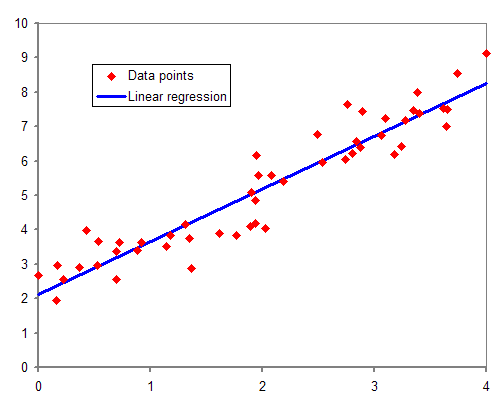

É possível ver que nem todos os pontos obedecem exatamente à relação ditada pela reta (isto é, há pontos que não estão exatamente "sobre a reta"; mas, sim, ligeraimente acima, ou abaixo, dela). Isto, contudo, é esperado em um modelo de regressão, por inúmeras fontes de incerteza associadas às medições.

Uma das métricas que utilizamos para avaliar a qualidade de uma regressão é o **erro quadrático médio (EQM)**, que mensura a diferença total entre cada predição da regressão ($y_{prediction}$; que no nosso caso seriam os valores de y para a reta azul) com o valor real de cada i-ésima medida ($y_{i}$; que no nosso caso seriam as coordenadas y para cada ponto vermelho do gráfico). O EQM pode ser definido como:

$EQM = \frac{1}{n}\sum_{i=1}^{n}(y_{prediction} - y_{i})^2$.

Isto posto, escreva uma função que calcule o EQM recebendo, como entrada, os vetores $y_{prediction}$ e $y_{i}$. Por exemplo, digamos que sua função se chame *calculate_eqm*, ela deve operar da seguinte forma:

In [88]:
# dados dois arrays quaisquer de mesmo tamanho, a função deve retornar o EQM
y_prediction = np.array([1,2,3])
y_i = np.array([0,0,3])
calculate_eqm(y_prediction,y_i)

1.6666666666666665

In [2]:
# Solução
def calculate_eqm(y_prediction, y_i):
    # complete a função
    pass

**6.** Suponha que você tenha uma imagem representada por uma matriz 3D (altura x largura x canais de cor).
Realize a operação de conversão de tons de cinza, que consiste em substituir os valores RGB pelos respectivos valores médios.

Considere que a matriz que representa a imagem pode ter dimensões quaisquer (isto é, qualquer número de pixel em quaisquer das dimensões). A única dimensão fixa será a terceira, que representa o vetor de cores em RGB.

In [ ]:
def converte_tons_de_cinza(matriz_da_imagem):
    pass

**7.** A eletroencefalografia (EEG) é uma técnica que mensura potenciais elétricos cerebrais em diversas regiões do escalpo do paciente. Suponha que você recebeu um conjunto de dados na forma de uma matriz de 64 x 512 elementos, em que cada linha contém o sinal gravado em um dos **eletrodos** espalhados pelo escalpo em um exame de EEG, e cada coluna contém um valor de potencial elétrico, em microvolts. 

Como o sinal de EEG é muito suscetível a ruídos externos (interferências na qualidade do sinal), uma operação comum para atenuar a interferência no sinal consiste em tirar a média do potencial elétrico de todos os eletrodos, e subtrair este valor de cada um deles. Isto atenua fontes de ruído ao sinal comuns a todos os eletrodos. Em termos matemáticos, o sinal processado por esta operação, $X_{e,i}$ para cada eletrodo (e) e amostra (i), é dado por:

$X_{e,i} = \hat{X_{e,i}} - \frac{1}{N}\sum_{e=1}^{N}\hat{X_{e,i}}$,

em que $\hat{X_{e,i}}$ representa o sinal original (ou seja, é a matriz de entrada de 64 x 512 elementos), e $N$ indica o total de eletrodos.

Com o exposto acima, escreva uma função que retorne uma matriz com os sinais de EEG processados conforme a operação mencionada. Sua função deve operar conforme o exemplo abaixo.

In [89]:
# vamos supor uma matriz de entrada gerada por dados aleatórios
X = np.random.randn(64,512)
X.shape # apenas para verificar as dimensões

(64, 512)

In [92]:
# a função deve executar a operação equacionada anteriormente, retornando uma nova matriz
X_processado = process_EEG_signal(X)
X_processado.shape

(64, 512)

In [93]:
# Somando as diferenças entre cada elemento das duas matrizes, apenas para ilustrar que elas não são iguais
(X_processado - X).sum()

-53.08727366483029

In [94]:
# Visualizando as matrizes, para verificar uma vez mais que, de fato, os elementos são diferentes
X

array([[ 0.29305925,  0.89663038, -0.61032202, ..., -0.88086364,
        -0.8818789 ,  0.51260497],
       [-0.01274415,  1.05439522,  0.47958092, ..., -2.15387924,
         0.70721168,  0.97029889],
       [ 1.09478371, -0.16120847,  1.58400361, ...,  0.20981813,
         2.17373837,  0.94032162],
       ...,
       [-0.45294842, -2.28939505,  1.10111998, ...,  1.63581703,
        -0.39394924, -1.13400723],
       [-0.22669886,  0.25413429, -1.17870637, ..., -0.09509442,
         0.90733806,  0.37999411],
       [ 0.15476933, -0.03654717, -1.09982762, ...,  0.67600047,
        -0.84533328, -0.56433144]])

In [95]:
# Matriz após o processamento descrito no enunciado
X_processado

array([[ 0.36713022,  0.85772513, -0.54902169, ..., -0.85626087,
        -0.97611435,  0.51718998],
       [ 0.06132682,  1.01548997,  0.54088126, ..., -2.12927647,
         0.61297623,  0.97488389],
       [ 1.16885469, -0.20011372,  1.64530394, ...,  0.23442091,
         2.07950292,  0.94490663],
       ...,
       [-0.37887744, -2.3283003 ,  1.16242031, ...,  1.6604198 ,
        -0.4881847 , -1.12942223],
       [-0.15262788,  0.21522904, -1.11740604, ..., -0.07049164,
         0.81310261,  0.38457911],
       [ 0.22884031, -0.07545242, -1.03852729, ...,  0.70060324,
        -0.93956874, -0.55974643]])

In [3]:
# Solução

**8.** Em estatística, um **outlier** é um valor que destoa consideravelmente da distribuição à qual está associado. Um dos critérios para idenficar outliers consiste em encontrar a **distância interquantil** (IQR), ou seja, a diferença entre o terceiro (Q3) e o primeiro quartis (Q1) da distribuição, e tomar como outliers todos os pontos abaixo de 1.5*IQR - Q1, ou acima de 1.5*IQR + Q3.

<img src = "https://blog.curso-r.com/images/posts/banner/outlier.webp" />

Escreva uma função que, dada uma matriz de dados de entrada de dimensões $N_{observações} \times N_{features}$ retorne três requisitos: 
- uma matriz booleana indicando a existência de outliers nos dados de entrada;
- a quantidade de outliers
- quem são os outliers (os valores).

**Algumas definições:**
- um *quantil* divide a distribuição, após ordenados os pontos, segundo algum ponto de corte;
- o **primeiro quartil** é o ponto para o qual 25 % dos valores da distribuição estão abaixo dele;
- o **terceiro quartil** é o ponto para o qual 75 % dos valores da distribuição estão abaixo dele.

Pode ser útil consultar a função **numpy.quantile**.

Exemplo de operação da função:

In [158]:
# Geremos um conjunto de dados qualquer
X = np.random.randn(300,15)
X

array([[-2.02108952,  0.57945921, -2.23074965, ..., -0.60349514,
         0.92180452, -0.15625722],
       [ 0.24904397,  0.03493447,  0.3515052 , ..., -0.46950081,
         0.20361331,  0.02715956],
       [ 0.55902525, -0.48435434,  0.90413414, ..., -0.54425743,
        -0.80769134, -0.07912549],
       ...,
       [-1.04069388, -0.24245725, -2.00308877, ...,  0.4084777 ,
        -1.81516131,  0.39063118],
       [-1.39275097,  0.3989636 ,  0.2926223 , ...,  1.2620666 ,
         0.72262949,  1.50737559],
       [ 0.15922011, -0.79810788, -1.60939896, ..., -0.08214499,
        -0.13167475,  0.15990558]])

In [167]:
# identificamos os requisitos com nossa com nossa função "locate_outliers"
is_outlier, outliers_count, outliers = locate_outliers(X)

In [168]:
is_outlier

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [165]:
outliers_count

44

In [166]:
outliers

array([-2.67240384,  3.00270904,  3.62317101,  3.18867865,  2.55581522,
       -2.82091429,  2.8757892 ,  2.70666036,  3.19514999, -3.40550318,
       -3.39825827,  2.6727295 ,  2.54498296, -2.69447104,  3.19521603,
        2.66372172, -2.77444948,  2.77421152,  2.69992869, -2.84831109,
       -2.83695779, -2.45908227,  3.07802106,  2.89314015, -2.68574682,
       -2.85019494,  2.43399574,  2.44291266, -2.92595937, -2.95911074,
       -3.03966003,  2.77543068, -2.67368414, -2.79965402, -3.0501958 ,
       -2.5437387 ,  3.08550649, -3.17666255, -3.05795476, -3.09826467,
        3.1399469 ,  3.18141942,  2.90564257, -2.89505054])

In [161]:
# Solução